# Personal Data Analyst Job Project
Questions for this Analysis:
   1. What Job Title pays the best?
        1.2 What are the top ten most common Job titles?
   2. What are Key skills for a Data Analyst?
   3. What are the top ten  companies by rating? 
        3.2 Is there any correlation between rating  and salary?
   4. Is there any correlation between salary and company size?
   5. What industry pay the highest salary?
   6. In what industry are the most companies?


(the dataset has been downloaded from kaggle)   


# # importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # loading the dataset 

In [2]:
df= pd.read_csv(r"C:\Users\Olegi Megi\Desktop\Data Analyst\Projects\Data_Analyst_Project.csv")
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
5,5,Data Analyst,$37K-$66K (Glassdoor est.),About Cubist\nCubist Systematic Strategies is ...,3.9,Point72\n3.9,"New York, NY","Stamford, CT",1001 to 5000 employees,2014,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
6,6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),Two Sigma is a different kind of investment ma...,4.4,Two Sigma\n4.4,"New York, NY","New York, NY",1001 to 5000 employees,2001,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
8,8,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,DMGT\n4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",-1
9,9,"Data Analyst, Merchant Health",$37K-$66K (Glassdoor est.),About Us\n\nRiskified is the AI platform power...,4.4,Riskified\n4.4,"New York, NY","New York, NY",501 to 1000 employees,2013,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,"Signifyd, Forter",-1


# Cleaning the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
# checking for duplicates 
df.duplicated().value_counts()

False    2253
dtype: int64

In [6]:
# checking for missing values
def missing_values_table(df):
    # Total missing values
    mis_val=df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent= 100 * df.isnull().sum()/ len(df)
    
    # make a table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename columns
    mis_val_table_ren_cols = mis_val_table.rename(
    columns = {0: "Missing Values", 1: "% of Total Values"})
    
    # sort the table by percent of missing desc
    mis_val_table_ren_cols = mis_val_table_ren_cols[
        mis_val_table_ren_cols.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
    
    # print some summary information
    print("Your selected dataframe has "), str(df.shape[1]), "columns.\n"
    "There are ", str(mis_val_table_ren_cols.shape[0]), " columns that have missing values."
    
    # return the dataframe with missign information
    return mis_val_table_ren_cols

In [7]:
missing_values_table(df)

Your selected dataframe has 


,Missing Values,% of Total Values
Company Name,1,0.0


In [8]:
df["Easy Apply"].value_counts()

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [9]:
df["Competitors"].value_counts()

-1                                                                 1732
Robert Half, Insight Global                                          14
Adecco, Manpower                                                     14
Artech Information Systems, Mindlance, Tech Mahindra                 10
Google, Microsoft, Samsung Electronics                               10
                                                                   ... 
Carr Riggs & Ingram, Cherry Bekaert, LBMC                             1
Transnational Foods, One Source Distributors                          1
GE                                                                    1
Fiserv, First Data, Jack Henry & Associates                           1
Centura Health, HealthONE, Denver Health and Hospital Authority       1
Name: Competitors, Length: 291, dtype: int64

In [10]:
df["Rating"].value_counts()[:5]

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
Name: Rating, dtype: int64

In [11]:
# replace -1, -1.0 and "-1" with nan
df = df.replace(-1, np.nan)
df = df.replace(-1.0, np.nan)
df = df.replace("-1", np.nan)

In [12]:
missing_values_table(df)

Your selected dataframe has 


,Missing Values,% of Total Values
Easy Apply,2173,96.4
Competitors,1732,76.9
Founded,660,29.3
Industry,353,15.7
Sector,353,15.7
Rating,272,12.1
Headquarters,172,7.6
Size,163,7.2
Type of ownership,163,7.2
Revenue,163,7.2


In [13]:
df["Company Name"],_ = df["Company Name"].str.split("\n", 1).str

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\400542167.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Company Name"],_ = df["Company Name"].str.split("\n", 1).str


In [14]:
df["Job Title"],df["Department"] = df["Job Title"].str.split(",", 1).str

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\3489532709.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Job Title"],df["Department"] = df["Job Title"].str.split(",", 1).str


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2252 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             1981 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2081 non-null   object 
 7   Size               2090 non-null   object 
 8   Founded            1593 non-null   float64
 9   Type of ownership  2090 non-null   object 
 10  Industry           1900 non-null   object 
 11  Sector             1900 non-null   object 
 12  Revenue            2090 non-null   object 
 13  Competitors        521 non-null    object 
 14  Easy Apply         80 non-null     object 
 15  Department         230 non-null    object 
dtypes: float64(2), object(14

In [16]:
df["Salary Estimate"],_=df["Salary Estimate"].str.split('(', 1).str 

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\286313662.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Salary Estimate"],_=df["Salary Estimate"].str.split('(', 1).str


In [17]:
# splitting "Salary Estimate" into Min and Max 
df["Min_Salary"], df["Max_Salary"] = df["Salary Estimate"].str.split("-").str
df["Min_Salary"] = df["Min_Salary"].str.strip(" ").str.lstrip("$").str.rstrip("K").fillna(0).astype("int")
df["Max_Salary"] = df["Max_Salary"].str.strip(" ").str.lstrip("$").str.rstrip("K").fillna(0).astype("int")

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\2642208817.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Min_Salary"], df["Max_Salary"] = df["Salary Estimate"].str.split("-").str


In [18]:
# add mean salary column
df["Mean_Salary"] = (df["Min_Salary"] + df["Max_Salary"]) / 2 
print(df["Mean_Salary"])

0       51.5
1       51.5
2       51.5
3       51.5
4       51.5
        ... 
2248    91.0
2249    91.0
2250    91.0
2251    91.0
2252    91.0
Name: Mean_Salary, Length: 2253, dtype: float64


In [19]:
df.drop(["Salary Estimate"], axis=1, inplace=True)

In [20]:
df.drop(["Job Description"], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Rating             1981 non-null   float64
 2   Company Name       2252 non-null   object 
 3   Location           2253 non-null   object 
 4   Headquarters       2081 non-null   object 
 5   Size               2090 non-null   object 
 6   Founded            1593 non-null   float64
 7   Type of ownership  2090 non-null   object 
 8   Industry           1900 non-null   object 
 9   Sector             1900 non-null   object 
 10  Revenue            2090 non-null   object 
 11  Competitors        521 non-null    object 
 12  Easy Apply         80 non-null     object 
 13  Department         230 non-null    object 
 14  Min_Salary         2253 non-null   int32  
 15  Max_Salary         2253 non-null   int32  
 16  Mean_Salary        2253 

In [22]:
# transforming data into a csv file for Viusaliztations with Power BI
data_jobs_cleaned = df
data_jobs_cleaned = data_jobs_cleaned.to_csv("Data Jobs cleaned.csv", index=False)

# Which companies are currently hiring?

In [23]:
# current openings 
df["Easy Apply"]=df["Easy Apply"].fillna(False).astype("bool")

In [24]:
df_easy_apply=df[df["Easy Apply"]==True]
df_easy_apply=df_easy_apply.groupby("Company Name")["Easy Apply"].count().reset_index()
df_company_opening=df_easy_apply.sort_values("Easy Apply", ascending=False).head(10)

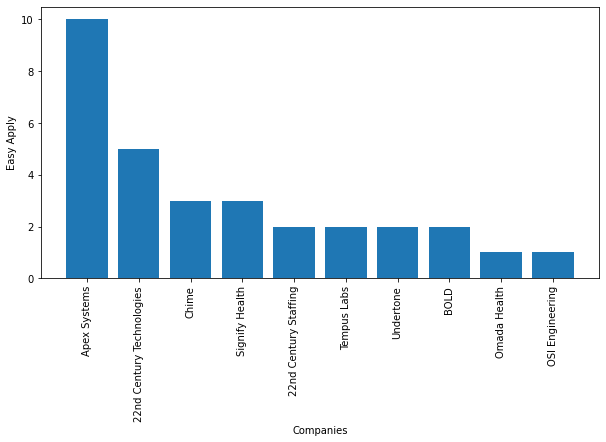

In [25]:
fig = plt.figure(figsize=(10,5))

x = df_company_opening["Company Name"]
y = df_company_opening["Easy Apply"]

plt.bar(x, y, label="Company Openings")

plt.xlabel("Companies")
plt.ylabel("Easy Apply")
plt.xticks(rotation=90)

plt.show()

# How does the Salary distribution for Data Analysts  look like?

C:\Users\Olegi Megi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Olegi Megi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


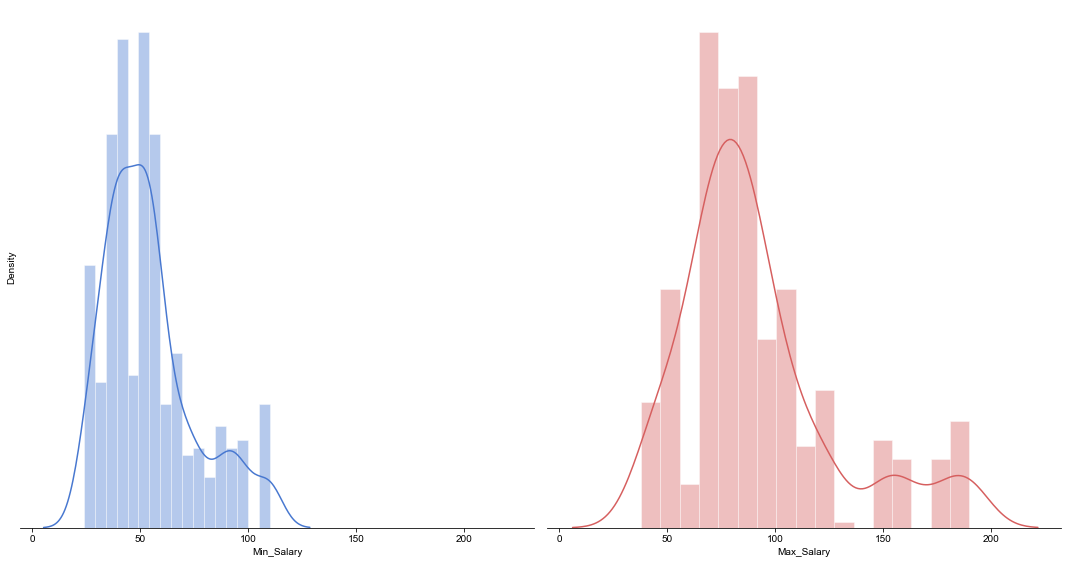

In [26]:
# Salary distribution of Data Analyst
df_data_analyst = df[df["Job Title"]=="Data Analyst"]

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.despine(left=True)
sns.set(style="white", palette="muted", color_codes=True)

# plot histogram
sns.distplot(df_data_analyst["Min_Salary"], color="b", ax=axes[0])

sns.distplot(df_data_analyst["Max_Salary"], color="r", ax=axes[1])

# customize plot
plt.setp(axes, yticks=[])
plt.ylabel("")
plt.tight_layout()

# What are the top 10 best paying jobs?

In [27]:
# visualizing the top ten paying job title by  salary
df_best_jobs=df.groupby('Job Title')[["Min_Salary", "Max_Salary"]].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(10)
print(df_best_jobs)

                                                Min_Salary  Max_Salary
Job Title                                                             
AI Insights Data Analyst                             110.0       190.0
Data Analyst with Data Mapping and API               110.0       190.0
Senior Data Analyst Studio Finance Engineering       110.0       190.0
Senior HR Data Analyst                               110.0       190.0
Sr. Data Analyst - Growth & Adoption                 110.0       190.0
Tableau Data Analyst Intern                          110.0       190.0
Business Intelligence Data Modeler/Analyst            99.0       178.0
Data Analyst (College & Foundation Reporting)         99.0       178.0
Data Scientist/Analyst - Wilbur Labs                  99.0       178.0
Data Studio Analyst                                   99.0       178.0


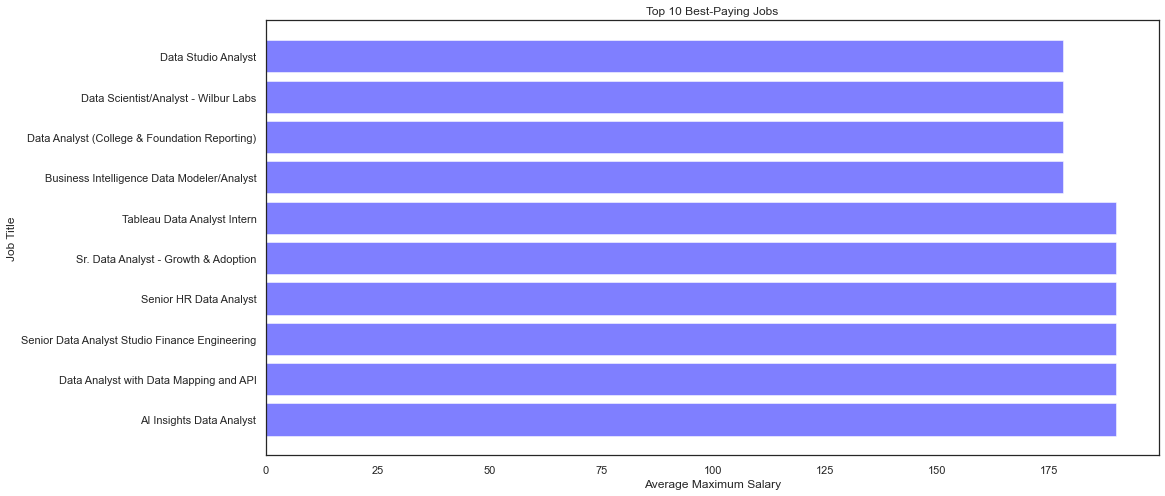

In [28]:
# Create a horizontal bar chart
fig = plt.figure(figsize=(16,8))
plt.barh(df_best_jobs.index, df_best_jobs["Max_Salary"], align='center', color='blue', alpha=0.5)

# Set the chart title and labels
plt.title('Top 10 Best-Paying Jobs')
plt.xlabel('Average Maximum Salary')
plt.ylabel('Job Title')

# Show the chart
plt.show()

# Is there any correlation between Rating and Salary

In [29]:
# grouping the data by raitng and salary to see correlation between rating and salary
df_companies_by_rating = df.groupby("Company Name")["Rating", "Max_Salary"].mean().sort_values(by="Rating", ascending=False).head(20)
print(df_companies_by_rating)

# grouping the data the same way but sorting it by the "Max_Salary"
df_campanies_by_max_salary_and_rating = df.groupby("Company Name")["Rating", "Max_Salary"].mean().sort_values(by="Max_Salary", ascending=False).head(20)
print(df_campanies_by_max_salary_and_rating)

                                  Rating  Max_Salary
Company Name                                        
xentity corporation                  5.0        91.0
Strive Health                        5.0        67.0
LaBine & Associates                  5.0       132.0
LaunchDarkly                         5.0       104.0
Priceonomics                         5.0       178.0
Crossfire Consulting Corporation     5.0        86.0
PriceSenz                            5.0        86.0
ITech Recruiting                     5.0       114.0
Trivest                              5.0        86.0
Revel IT                             5.0        52.0
1872 Consulting                      5.0        76.0
Turn/River Capital                   5.0       159.0
Averity                              5.0        87.0
Pddn                                 5.0        66.0
Payzer                               5.0        86.0
Xeris Pharmaceuticals, Inc.          5.0       129.0
LEAPROS                              5.0      

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\796427154.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_companies_by_rating = df.groupby("Company Name")["Rating", "Max_Salary"].mean().sort_values(by="Rating", ascending=False).head(20)
C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\796427154.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_campanies_by_max_salary_and_rating = df.groupby("Company Name")["Rating", "Max_Salary"].mean().sort_values(by="Max_Salary", ascending=False).head(20)


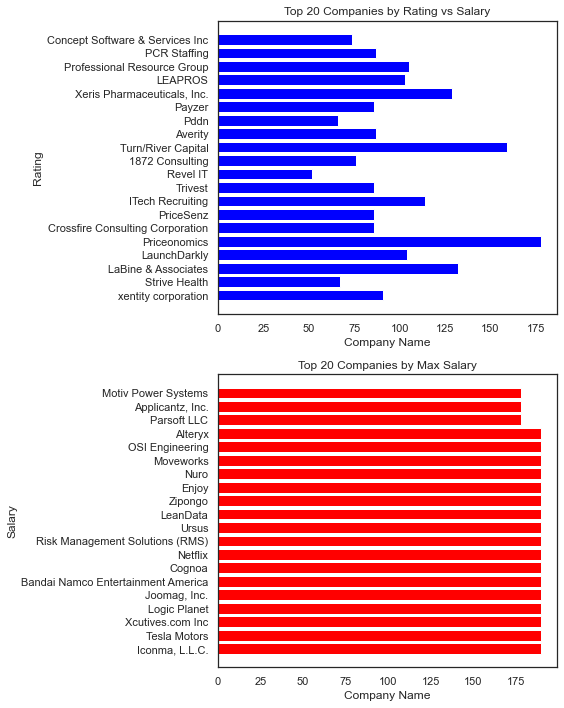

In [30]:
# Create a bar chart
fig, ax = plt.subplots(2,1, figsize=(8,10))
ax[0].barh(df_companies_by_rating.index, df_companies_by_rating["Max_Salary"],align="center", color="blue")
ax[0].set_title("Top 20 Companies by Rating vs Salary")
ax[0].set_xlabel("Company Name")
ax[0].set_ylabel("Rating")

ax[1].barh(df_campanies_by_max_salary_and_rating.index, 
           df_campanies_by_max_salary_and_rating["Max_Salary"],
           align="center", color="red") 
ax[1].set_title("Top 20 Companies by Max Salary")
ax[1].set_xlabel("Company Name")
ax[1].set_ylabel("Salary")

plt.tight_layout()
plt.show()

# Is there any correlation between company size and salary?

Size
1 to 50 employees          90.564841
10000+ employees           87.773333
1001 to 5000 employees     90.810345
201 to 500 employees       88.783133
5001 to 10000 employees    92.896907
501 to 1000 employees      89.450237
51 to 200 employees        90.486936
Name: Max_Salary, dtype: float64


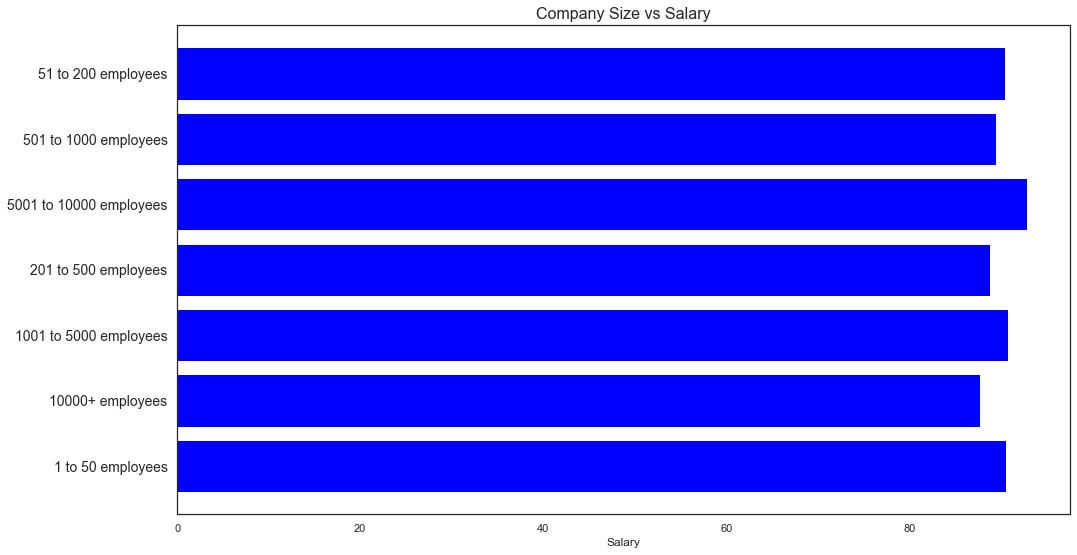

In [31]:
df_company_size_vs_salary = df.groupby("Size")["Max_Salary"].mean()
df_company_size_vs_salary = df_company_size_vs_salary[df_company_size_vs_salary.index != "Unknown"]
print(df_company_size_vs_salary.head(10))


# create a bar chart 
fig = plt.figure(figsize=(16,9))

plt.barh(df_company_size_vs_salary.index, df_company_size_vs_salary.values, color="blue", 
        align="center")

plt.title("Company Size vs Salary", fontsize=16)
plt.xlabel("Salary")
plt.ylabel("")
plt.yticks(fontsize=14)

plt.show()

In [32]:
df_company_size = df["Size"].value_counts()

In [33]:
df_company_size = pd.DataFrame(df_company_size)
df_company_size["employee_size"] = df_company_size.index

In [34]:
df_company_size.reset_index(inplace=True)
df_company_size.drop(["index"], axis=1, inplace=True)
df_company_size.head(10) 

,Size,employee_size
0,421,51 to 200 employees
1,375,10000+ employees
2,348,1001 to 5000 employees
3,347,1 to 50 employees
4,249,201 to 500 employees
5,211,501 to 1000 employees
6,97,5001 to 10000 employees
7,42,Unknown


In [35]:
df_company_size = df_company_size[df_company_size["employee_size"] != "Unknown"]
df_company_size.head(10)

,Size,employee_size
0,421,51 to 200 employees
1,375,10000+ employees
2,348,1001 to 5000 employees
3,347,1 to 50 employees
4,249,201 to 500 employees
5,211,501 to 1000 employees
6,97,5001 to 10000 employees


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

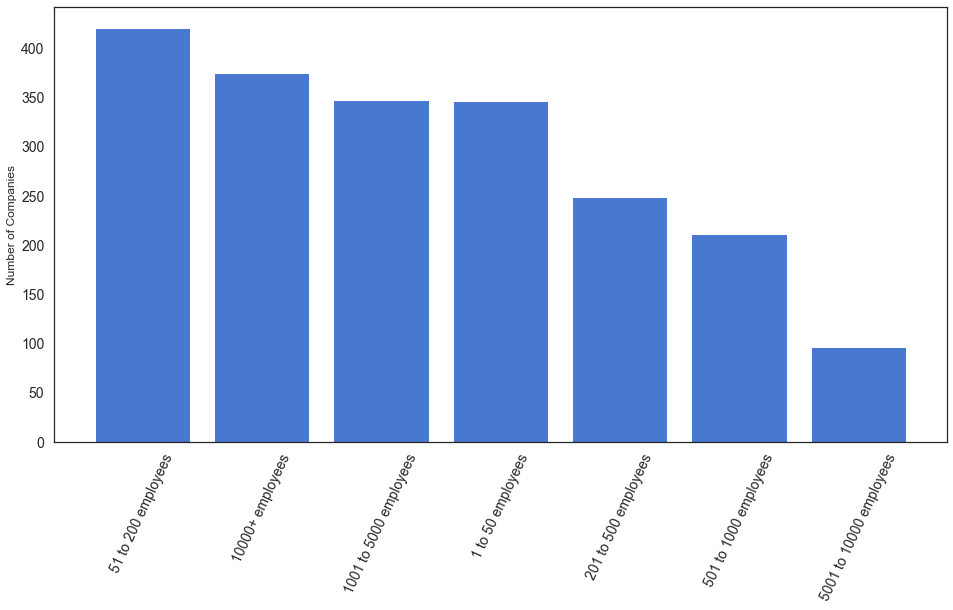

In [36]:
fig = plt.figure(figsize=(16,8))

plt.bar(df_company_size["employee_size"], df_company_size["Size"])

plt.ylabel("Number of Companies")
plt.yticks(fontsize=14)
plt.xticks(rotation=65, fontsize=14)

# Is there any correlation between industry and salary?

In [37]:
# grouping the data by "Industry" and "Max_Salary"
df_industry_by_salary = df.groupby("Industry")["Max_Salary"].mean().sort_values(ascending=False).head(20)
print(df_industry_by_salary)

Industry
Education Training Services                 116.000000
Gambling                                    112.000000
Health Care Products Manufacturing          110.400000
Transportation Equipment Manufacturing      109.666667
Electrical & Electronic Manufacturing       108.500000
Drug & Health Stores                        108.000000
Sports & Recreation                         107.333333
Biotech & Pharmaceuticals                   104.848485
Real Estate                                 104.583333
Truck Rental & Leasing                      102.000000
Internet                                    100.892308
Utilities                                    99.500000
Cable, Internet & Telephone Providers        99.000000
Computer Hardware & Software                 97.693694
Enterprise Software & Network Solutions      96.623188
Department, Clothing, & Shoe Stores          95.200000
Venture Capital & Private Equity             94.166667
Accounting                                   93.435897
C

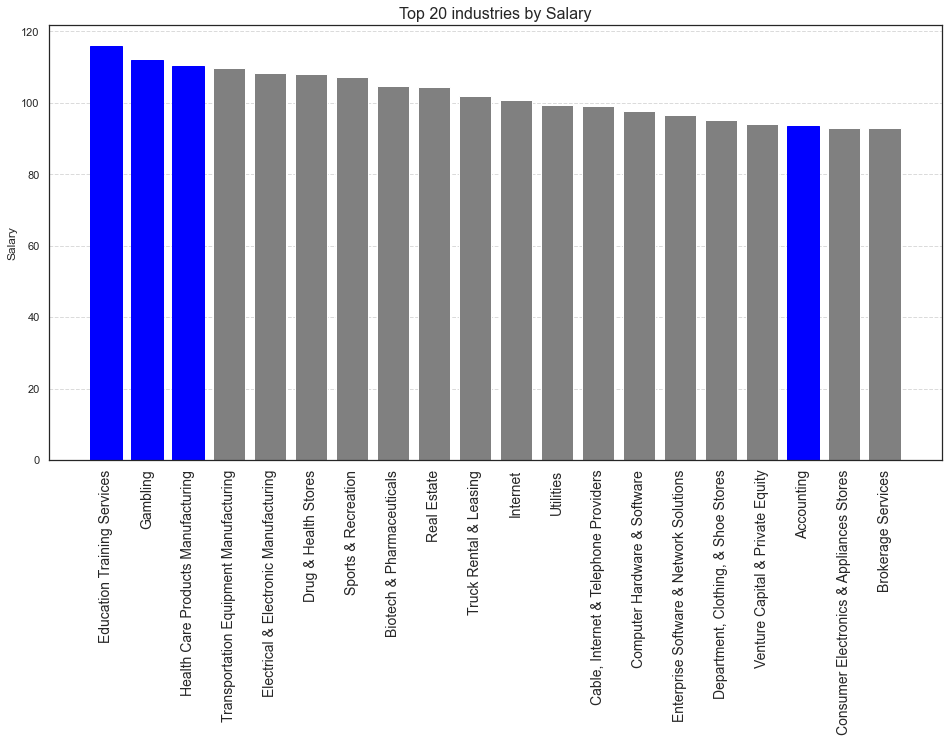

In [38]:
# visualizing the 20 best paying industries 
fig = plt.figure(figsize=(16,8))

# create plot
plot = plt.bar(df_industry_by_salary.index, df_industry_by_salary.values, color="grey")

# set the color for top 3 industries to blue
for i in range(3):
    plot[i].set_color("blue")

# set the color for a certain industry
plot[df_industry_by_salary.index.get_loc("Accounting")].set_color("blue")

# customize plot
plt.title("Top 20 industries by Salary", fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel("Salary")

# add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)


# What are the most common job titles?



In [39]:
df_common_job_title = df["Job Title"].value_counts()

In [40]:
df_common_job_title = pd.DataFrame(df_common_job_title)
df_common_job_title["count"] = df_common_job_title.index
df_common_job_title.head()

,Job Title,count
Data Analyst,443,Data Analyst
Senior Data Analyst,105,Senior Data Analyst
Junior Data Analyst,30,Junior Data Analyst
Business Data Analyst,28,Business Data Analyst
Sr. Data Analyst,26,Sr. Data Analyst


In [41]:
df_common_job_title.reset_index(inplace=True)
df_common_job_title.drop(["index"], axis=1, inplace=True)
df_common_job_title = df_common_job_title.rename(columns={'Job Title': 'job_count', 'count': 'job_title'})
df_common_job_title.head(10)

,job_count,job_title
0,443,Data Analyst
1,105,Senior Data Analyst
2,30,Junior Data Analyst
3,28,Business Data Analyst
4,26,Sr. Data Analyst
5,20,Data Analyst II
6,19,Lead Data Analyst
7,18,Data Quality Analyst
8,17,Data Analyst Junior
9,16,Data Governance Analyst


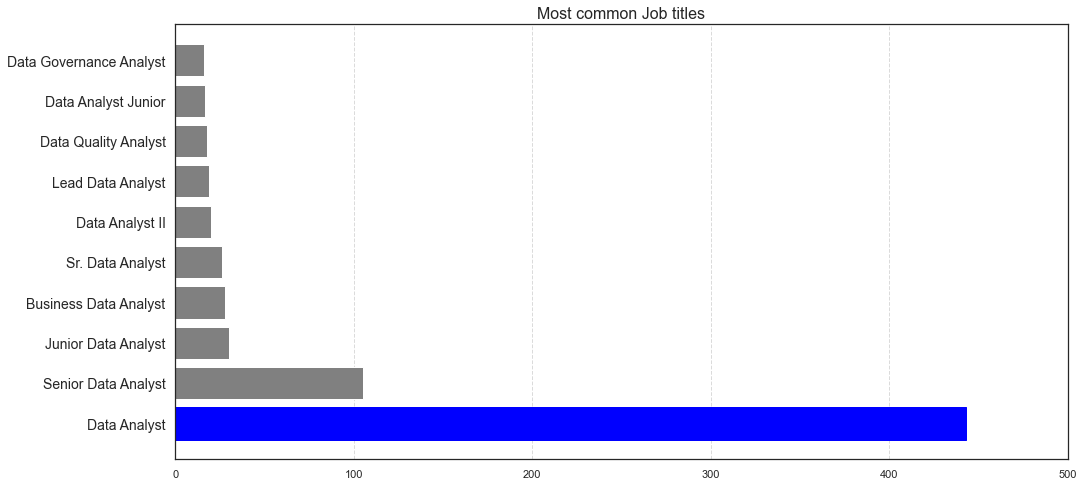

In [42]:
# the top ten most common jobtitle
df_common_job_title = df_common_job_title.sort_values(by="job_count", ascending=False).head(10)

fig = plt.figure(figsize=(16,8))

# create plot
plot = plt.barh(df_common_job_title["job_title"], df_common_job_title["job_count"], color="grey")

# set color  
for i in range(1):
    plot[i].set_color("blue")

# customize plot
plt.title("Most common Job titles", fontsize=16)
plt.yticks(fontsize=14)
plt.xlim(0, 500)

# add gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7 )

# Adding the Salary to the most common job titles 

In [43]:
# merging the tables on the job_title column
merged_df = pd.merge(df_common_job_title, df, left_on="job_title", right_on="Job Title")

# grouping the merged data 
merged_df = merged_df.groupby("Job Title")["job_count", "Max_Salary"].mean().sort_values(by="job_count", 
            ascending=False).head(10)

C:\Users\Olegi Megi\AppData\Local\Temp\ipykernel_2404\4047184792.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_df = merged_df.groupby("Job Title")["job_count", "Max_Salary"].mean().sort_values(by="job_count",


In [44]:
merged_df.head(10)

,job_count,Max_Salary
Job Title,,
Data Analyst,443.0,90.979684
Senior Data Analyst,105.0,89.371429
Junior Data Analyst,30.0,78.800000
Business Data Analyst,28.0,94.892857
Sr. Data Analyst,26.0,96.653846
Data Analyst II,20.0,82.050000
Lead Data Analyst,19.0,95.210526
Data Quality Analyst,18.0,84.555556
Data Analyst Junior,17.0,79.705882


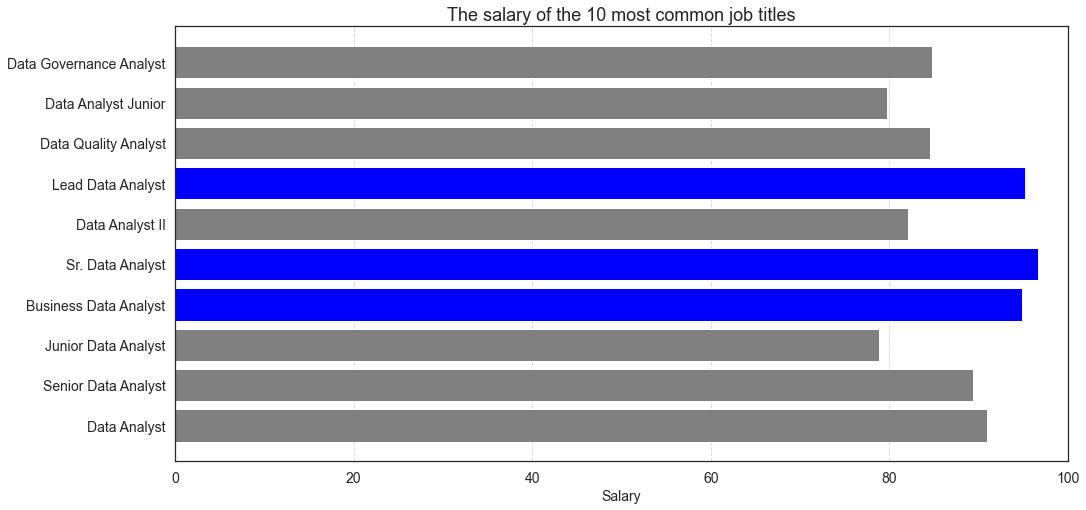

In [45]:
# visualize the data above
fig = plt.figure(figsize=(16,8))

#create the plot
plt.barh(merged_df.index, merged_df["Max_Salary"], color="grey")

# make the top three Job titles by salary blue 
# find the top 3 by salary
top_salaries = merged_df.nlargest(3, columns="Max_Salary")

# get the index of the top Job titles
top_indexes = [merged_df.index.get_loc(job) for job in top_salaries.index]

# set the color of the bars
for job_title in top_salaries.index:
    index = merged_df.index.get_loc(job_title)
    plt.barh(index, merged_df.loc[job_title, "Max_Salary"], color="blue")

# customize the plot
plt.title("The salary of the 10 most common job titles", fontsize=18)
plt.yticks(fontsize=14)
plt.xlabel("Salary", fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(0, 100)

# add gridline to x axis
plt.grid(axis="x", linestyle="--", alpha=0.7)

# What sector has the highest and lowest Salary?

In [46]:
# grouping the data by sector and maxsalary
df_sector_by_salary = df.groupby("Sector")["Max_Salary"].mean().sort_values(ascending=False).head(10)
print(df_sector_by_salary)

Sector
Biotech & Pharmaceuticals             104.848485
Real Estate                           104.583333
Arts, Entertainment & Recreation      100.857143
Information Technology                 93.196491
Accounting & Legal                     91.930233
Health Care                            90.251656
Business Services                      89.866412
Consumer Services                      89.857143
Telecommunications                     89.000000
Construction, Repair & Maintenance     88.125000
Name: Max_Salary, dtype: float64


In [47]:
df_sector_by_min_salary = df.groupby("Sector")["Min_Salary"].mean().sort_values(ascending=True).head(10)
print(df_sector_by_min_salary)

Sector
Restaurants, Bars & Food Services    39.000000
Mining & Metals                      41.000000
Oil, Gas, Energy & Utilities         48.000000
Government                           48.055556
Retail                               49.078947
Non-Profit                           49.115385
Finance                              50.644970
Telecommunications                   51.727273
Education                            51.807692
Media                                51.833333
Name: Min_Salary, dtype: float64


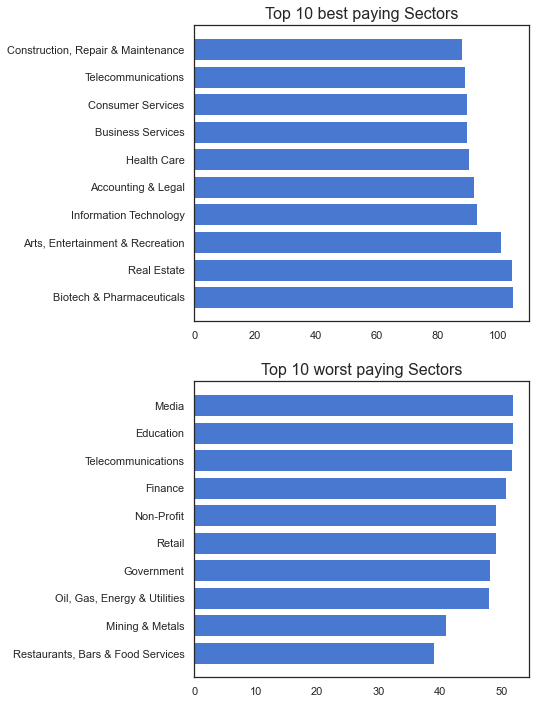

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(6,12))

# creating plot for the sector by highest salary
ax[0].barh(df_sector_by_salary.index, df_sector_by_salary.values)

# creating plot for the sector by lowest salary
ax[1].barh(df_sector_by_min_salary.index, df_sector_by_min_salary.values)

# customize plot
ax[0].set_title("Top 10 best paying Sectors", fontsize=16)
ax[1].set_title("Top 10 worst paying Sectors", fontsize=16)

ax[0].set_yticks(df_sector_by_salary.index, fontsize=14)
ax[1].set_yticks(df_sector_by_min_salary.index, fontsize=14)

# show plot
plt.show()
